<a href="https://www.kaggle.com/code/yashrajojha28/image-resizing?scriptVersionId=116001162" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import os
import gc
import json
import math
import cv2
import PIL
from PIL import Image
import numpy as np

import matplotlib.pyplot as plt
import pandas as pd

import scipy
from tqdm import tqdm
%matplotlib inline
from keras.preprocessing import image

### Creating a csv file for training data

In [3]:
esophagusdir = '/kaggle/input/esophageal-endoscopy-images/Endoscopy-esophagus/esophagus'
esophaguslis = os.listdir(esophagusdir)

In [4]:
#creating a list with all esophagus cancer image
imagepath = '/kaggle/input/esophageal-endoscopy-images/Endoscopy-esophagus/esophagus'
imagelist = []
for name in tqdm(esophaguslis):
    totalpath = imagepath+'/'+name
    imagelist.append(totalpath)

100%|██████████| 1689/1689 [00:00<00:00, 1214500.16it/s]


In [5]:
nonesophagusdir = '/kaggle/input/esophageal-endoscopy-images/Endoscopy-esophagus/no-esophagus'
nonesophaguslis = os.listdir(nonesophagusdir)

In [6]:
nonesoimglist = []
for name in tqdm(nonesophaguslis):
    totalpath = nonesophagusdir+'/'+name
    nonesoimglist.append(totalpath)

100%|██████████| 8973/8973 [00:00<00:00, 1137711.30it/s]


In [12]:
imagename = imagelist + nonesoimglist

In [13]:
targetlist = []
for i in range(len(imagename)):
    if i<1689:
        targetlist.append(1)
    else:
        targetlist.append(0)

In [14]:
# Import pandas package
import pandas as pd

# Define a dictionary containing Students data
data = {'imagename': imagename,
        'target':targetlist}
# Convert the dictionary into DataFrame
df = pd.DataFrame(data)
print(df)

                                               imagename  target
0      /kaggle/input/esophageal-endoscopy-images/Endo...       1
1      /kaggle/input/esophageal-endoscopy-images/Endo...       1
2      /kaggle/input/esophageal-endoscopy-images/Endo...       1
3      /kaggle/input/esophageal-endoscopy-images/Endo...       1
4      /kaggle/input/esophageal-endoscopy-images/Endo...       1
...                                                  ...     ...
10657  /kaggle/input/esophageal-endoscopy-images/Endo...       0
10658  /kaggle/input/esophageal-endoscopy-images/Endo...       0
10659  /kaggle/input/esophageal-endoscopy-images/Endo...       0
10660  /kaggle/input/esophageal-endoscopy-images/Endo...       0
10661  /kaggle/input/esophageal-endoscopy-images/Endo...       0

[10662 rows x 2 columns]


In [ ]:
#converting the dataframe to csv
df.to_csv('traindata.csv')

### Creating numpy array for the images

In [15]:
imSize = 128

In [16]:
def preprocess_image(image_path, desired_size=imSize):
    im = Image.open(image_path)
    im = im.resize((desired_size, )*2, resample=Image.LANCZOS)
    
    return im

In [17]:
N = df.shape[0]
# create an empty matrix for storing the images
x_train = np.empty((N, imSize, imSize, 3), dtype=np.uint8)

# loop through the images from the images ids from the target\id dataset
# then grab the cooresponding image from disk, pre-process, and store in matrix in memory
for i, image_id in enumerate(tqdm(df['imagename'])):
    x_train[i, :, :, :] = preprocess_image(
        df['imagename'][i]
    )

  0%|          | 0/10662 [00:00<?, ?it/s]/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 10662/10662 [07:01<00:00, 25.29it/s]


In [ ]:
np.save('x_train_128', x_train)

### Showing the images and numpy array

#### Images of Eso and Non Eso Cancer

Text(0.5, 1.0, 'No Cancer')

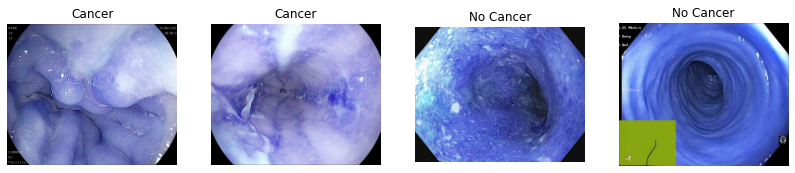

In [11]:
fig = plt.figure(figsize=(14, 14))
# setting values to rows and column variables
rows = 1
columns = 4
Image1 = cv2.imread(imagelist[100])
Image2 = cv2.imread(imagelist[101])
Image3 = cv2.imread(nonesoimglist[100])
Image4 = cv2.imread(nonesoimglist[101])

fig.add_subplot(rows, columns, 1)
plt.imshow(Image1)
plt.axis('off')
plt.title("Cancer")

fig.add_subplot(rows, columns, 2)
plt.imshow(Image2)
plt.axis('off')
plt.title("Cancer")

fig.add_subplot(rows, columns, 3)
plt.imshow(Image3)
plt.axis('off')
plt.title("No Cancer")

fig.add_subplot(rows, columns, 4)
plt.imshow(Image4)
plt.axis('off')
plt.title("No Cancer")

#### Conversion of the following images to a numpy array

In [21]:
print('Cancer Image 1',x_train[100])
print('Cancer Image 2',x_train[101])
print('No Cancer Image 3',x_train[1689+100])
print('No Cancer Image 4',x_train[1689+101])

Cancer Image 1 [[[ 0  0  0]
  [ 1  1  1]
  [ 1  1  1]
  ...
  [ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  1  1]
  [22 22 22]
  [10 10 10]
  ...
  [29 29 29]
  [20 20 20]
  [15 15 15]]

 ...

 [[ 6  6  6]
  [68 68 68]
  [15 15 15]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 3  3  3]
  [13 13 13]
  [ 3  3  3]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]
  ...
  [ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]]
Cancer Image 2 [[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
No Cancer Image 3 [[[15 15 15]
  [